<a href="https://colab.research.google.com/github/Ali-Tahseen/demo-repo/blob/main/Dog_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed Classification
This notebook builds an end to end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

1. Problem  
Identifying the breed of a given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

2. Data  
The data that we are using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/competitions/dog-breed-identification/data

3. Evaluation  
The evaluation is a file with prediction probabilities for each dog breed of each test image.

4. Features  
Some information about the data:

* We're dealing with images (unstructed data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ images in the test set (these images have no labels, beacuse we'll want to predict them).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# How to unzip a file in Colab
# !unzip "/content/drive/MyDrive/Dog_Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog_Vision/"

# Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [4]:
# # Import TensorFLow into Colab
# import tensorflow as tf
# print("TF version:", tf.__version__)

In [5]:
# Upgrading Tensorflow if not available 
# from tensorflow.python.ops.math_ops import xdivy
# # Import TF 2.x which is upgrading it if not up-to-date
# try:
#   # %tenserflow_version only exists in Colab
#   %tensorflow_version 2.x
# except Exception:
#   pass

In [6]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.8.2
TF Hub version: 0.12.0
GPU available (YESSSS!!!!)


* In order to have access to GPU then click "Runtime" beside "Insert" and then click "Change runtime type" and then select GPU from the drop down menu

#Getting our data ready (turning into Tensors)

* With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

* Let's start by accessing our data and checking out the labels.

In [7]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog_Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


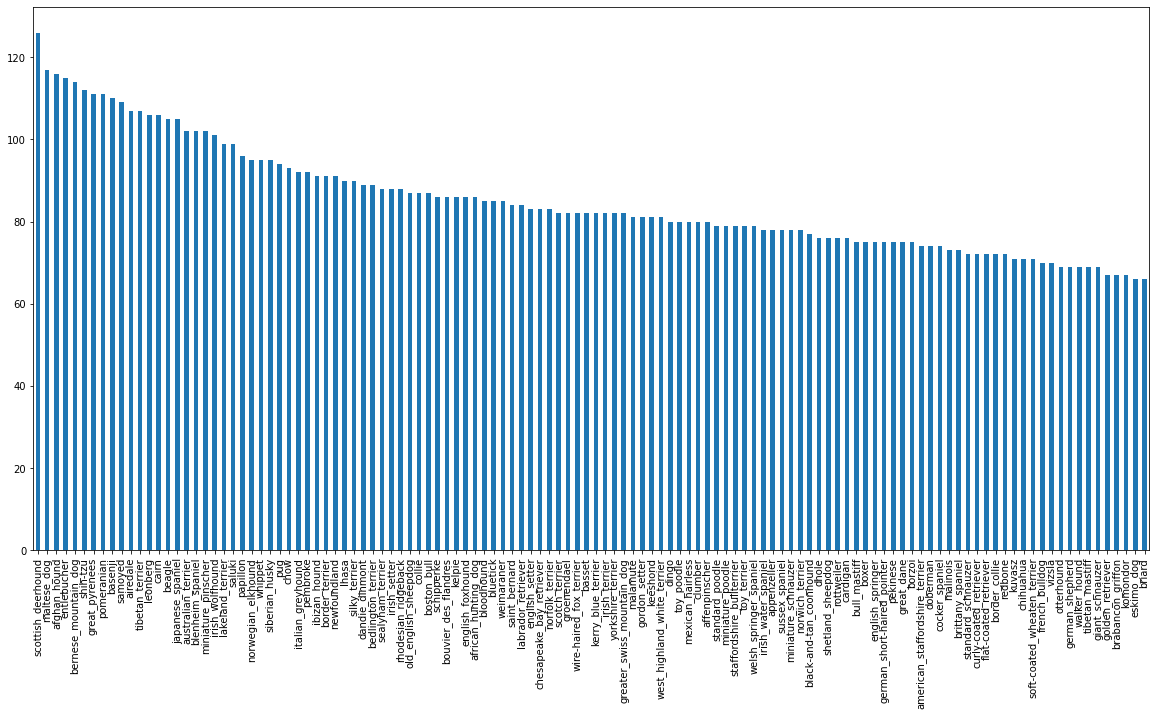

In [9]:
# how many images are there for each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [10]:
labels_csv["breed"].value_counts().median()

82.0

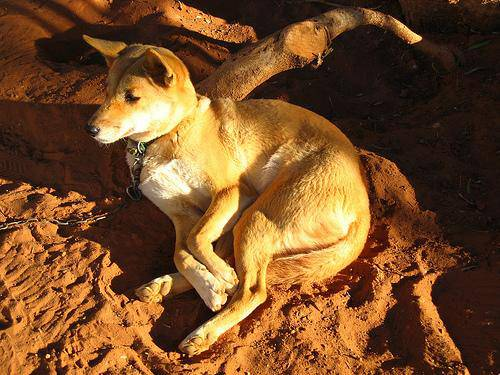

In [11]:
# let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Dog_Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog_Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files!!! Proceed.


In [15]:
len(filenames)

10222

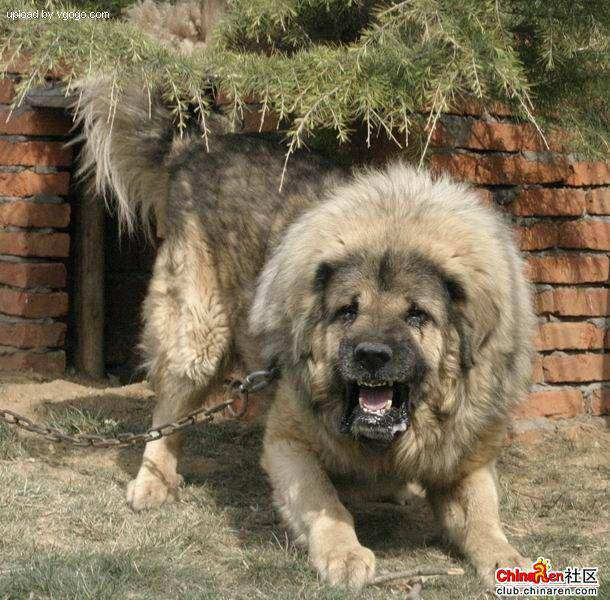

In [16]:
# One more check
Image(filenames[9000])

In [17]:
labels_csv["breed"][9000]

'tibetan_mastiff'

* Since we've now got our training image filepaths in a list, let's prepare our labels.

In [18]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing as above 
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories")

Number of labels matches number of filenames!


In [20]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [21]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
len(boolean_labels)

10222

In [24]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [26]:
filenames[:10]

['/content/drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [27]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

# Create our own validation set
* Since the dataset from kaggle doesn't come with a validation set, we're going to create our own.

In [28]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [29]:
len(filenames)

10222

* We're going to start off experimenting with ~1000 images and increase as needed.

In [30]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [31]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [32]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog_Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog_Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog_Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog_Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Dog_Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

Before we do, let's see what importing an image looks like

In [33]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [34]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [35]:
image.max(), image.min()

(255, 0)

In [36]:
# tensorflow can also convert images to numbers like numpy
# Tensorflow is faster because it can run of GPU
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

In [37]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  # We do this because computing becomes more efficient with this type of process and we call it normalization
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [38]:
# Just seeing what the lines in the codes in the function does 
tensor = tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [39]:
# Just seeing what the lines in the codes in the function does 
tf.image.decode_jpeg(tensor, channels=3)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

In [40]:
# Just seeing what the lines in the codes in the function does 
tensor = tf.image.decode_jpeg(tensor, channels=3)

In [41]:
# Just seeing what the lines in the codes in the function does 
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be)

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this: `(image, label)`   



In [42]:
# Create s simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, 
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [43]:
# Demo of the above
process_image(X[42], tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Now we've got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches. 

In [44]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # y test data labels input comes as none
  #If the data is a test dataset, we prbably don't have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) #only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    # we can directly run the process image since we don't have any labels
    return data_batch

  # if te data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    # because in validation set we have images and labels we need we need to map the get_image_label 
    # which also processes our images using process_image function
    return data_batch
  
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X)) # len(X) means shuffle them all
    # If you shuffle after processing the image then it takes longer time to shuffle an image than a filename
    
    # Create (image, label) tuples (this also turns the image into a preprocessed image)
    data = data.map(get_image_label)

    #Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [45]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [46]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches, however, these can be a litle hard to understand/comprehend, let's visual the image




In [47]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Dislays a plot of 25 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1) # rows, columns, index
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [48]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

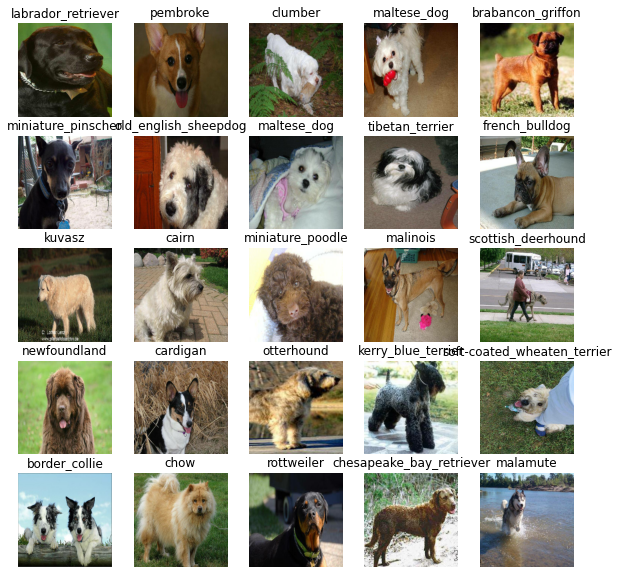

In [49]:
# since data is in batch we need to unbatch it to visualize it
# so we need to turn it into a iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
# Now let's visualize the data in a training batch
# Everytime we run the batch it's gonna shuffle the data since our create_data_batches function always shuffle the data
show_25_images(train_images, train_labels)

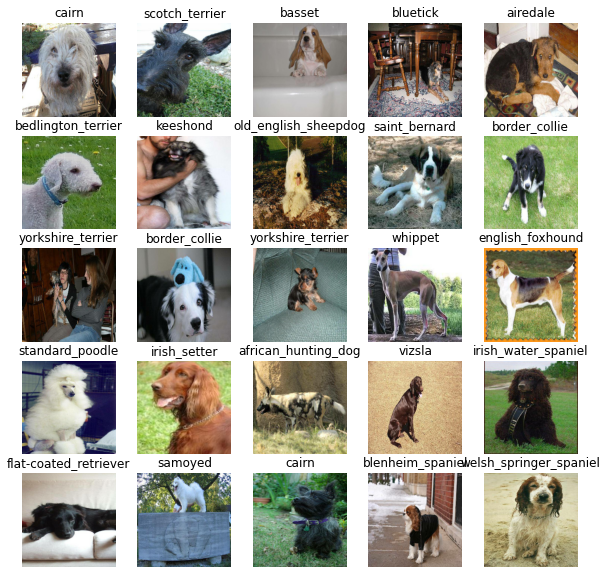

In [50]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [51]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, weight , colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Complies the model(says it should be evaluated and improved)
* Builds the model(tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [52]:
# Creates a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Buidling model with:", MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
                            # if we are working with binary classification (BinaryCrossentropy()) then the activation is sigmoid
                            # and if we are working with multi-class classification then the activation is softmax
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Loss is the meaasure of how well the model is guessing
      # The higher the loss the worse the model is doing
      optimizer=tf.keras.optimizers.Adam(), # Optimizer lowers the loss and Adam optimizer perform well in most models
      metrics=["accuracy"] # metrics gives the accuracy of how well the model is predicting the labels
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [53]:
model = create_model()
model.summary()

Buidling model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [54]:
### Using the mobilenet_v2 for transfer learning

## Create callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for Tensorboard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBorad callback which is able to save logs
2. a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training)

* TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [55]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [56]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing Tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog_Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)   

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

By default it moniters the validation loss but we will be monitering the validation accuracy.



In [57]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working

In [58]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [59]:
# Check to make sure we're still running on a GPU
print("GPU", "available (YEESSSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YEESSSSS!!!!!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [60]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, # the data batch which contains the images and labels
            epochs=NUM_EPOCHS, # AKA how many times our model is allowed to see the trainingdata before it stops
            # or how many times chnaces our model has to pass over the entire training dataset to find patterns
            validation_data=val_data, # a data batch
            validation_freq=1, # Is how often do we want to test the patterns that our model has found in a validation set
            callbacks=[tensorboard, early_stopping])
            # callbacks are tensorboards
                        
  # Return the fitted model
  return model

In [61]:
# Fit the model to the data
# first time training the model on datatypes like images the first epoch will take the longest
# This is because functions that we have written is getting intialized aka loading the data in the GPU
model = train_model()

Buidling model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 408s 16s/step - loss: 4.4382 - accuracy: 0.1213 - val_loss: 3.4345 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 4s 163ms/step - loss: 1.5616 - accuracy: 0.7013 - val_loss: 2.2185 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 4s 166ms/step - loss: 0.5525 - accuracy: 0.9325 - val_loss: 1.7436 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 4s 164ms/step - loss: 0.2439 - accuracy: 0.9900 - val_loss: 1.5349 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 4s 140ms/step - loss: 0.1434 - accuracy: 0.9987 - val_loss: 1.4688 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 4s 144ms/step - loss: 0.0978 - accuracy: 1.0000 - val_loss: 1.4269 - val_accuracy: 0.6250
Epoch 7/100
25/25 [==============================

* It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent model overfitting in deep learning neural networks?

* `Note`: Overfitting to begin with is a good thing! It means our model is learning!!!



### Checkig the TensorBoard logs

The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [62]:
%tensorboard --logdir /content/drive/MyDrive/Dog_Vision
#%tensorboard --logdir ~/

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model

In [63]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose is just used to show the progress
predictions

7/7 [==============================] - 3s 110ms/step


array([[5.5720255e-04, 1.4678274e-04, 9.6922630e-04, ..., 5.7702174e-04,
        4.2732612e-05, 9.4958236e-03],
       [4.7788289e-03, 4.8944354e-04, 1.9322522e-02, ..., 1.3784373e-03,
        2.7123115e-03, 2.7770677e-04],
       [1.3437563e-04, 1.7284007e-04, 3.5350601e-04, ..., 1.6116223e-04,
        6.7644403e-04, 1.9054150e-04],
       ...,
       [7.1378970e-05, 1.2301840e-04, 2.2756844e-04, ..., 3.1781294e-06,
        6.1483751e-04, 8.7287117e-05],
       [3.3736292e-03, 1.4269084e-04, 1.2896491e-04, ..., 2.7643036e-04,
        1.3269587e-04, 2.1507571e-02],
       [1.8956610e-04, 8.0320588e-06, 5.4897671e-04, ..., 1.2207603e-02,
        9.4620882e-05, 4.3103588e-04]], dtype=float32)

* in each prediction index the values will be in the interval of (0,1) and sum to 1 due to the softmax
so the value above in predictions is like that

In [64]:
predictions.shape

(200, 120)

In [65]:
len(y_val)

200

In [66]:
len(unique_breeds)

120

In [67]:
# First prediction
index = 42
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")
# the array of numbers below are prediction probability

[5.57202555e-04 1.46782739e-04 9.69226297e-04 2.85855949e-05
 2.64457485e-04 2.15455118e-04 3.61400321e-02 8.80407228e-04
 2.93141376e-04 5.50655008e-04 1.06218085e-03 1.30484492e-04
 2.04597061e-04 5.96151454e-04 1.91148545e-03 2.01079019e-04
 1.53470770e-04 1.89217299e-01 2.31697923e-05 3.41737650e-05
 9.03408392e-04 1.89829749e-04 2.66340812e-05 4.35873354e-03
 2.04526834e-04 1.07006868e-04 4.72579375e-02 6.14983510e-05
 1.68253304e-04 5.06592507e-04 1.19966302e-04 6.76091062e-04
 4.97263100e-04 5.06343713e-05 4.15831855e-05 5.71891703e-02
 8.65106485e-05 3.33947741e-04 1.18033044e-04 1.13031791e-04
 1.39569922e-03 3.04197747e-05 3.40109458e-04 7.79404436e-05
 5.98646284e-06 2.59335739e-05 3.35186378e-05 9.18580627e-04
 4.26561688e-04 1.32742221e-04 5.35353574e-05 6.60959922e-05
 1.26069994e-04 5.66687668e-05 6.07452530e-04 7.98472174e-05
 6.10600226e-04 3.53310816e-03 1.22828904e-04 2.24146783e-01
 1.01399448e-04 3.56114942e-05 9.71612637e-04 1.26960294e-04
 2.47951131e-04 1.496424

In [68]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

`Note:` Prediction probabilities are also known as confidence levels

In [69]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on a array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'dingo'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [70]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [71]:
images_ = []
labels_ = []

# Loop through unbatch data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [72]:
get_pred_label(labels_[0])

'cairn'

from pandas._libs.tslibs.timestamps import integer_op_not_supported
Now we've got ways to get:
* Prediction labels
* Validation labels(truth labels)
* Validation images 

Let's make some function to make these all a bit more visualize.

We'll create a function which:
* Takes a array of prediction probabilities, an array of truth labels and an array of images and integer_op_not_supported
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [73]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

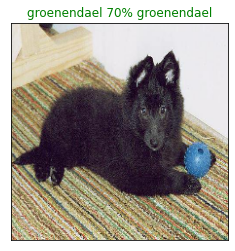

In [74]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅

Find the top 10:
* Prediction probabilities indexes ✅
* Prediction probabilities values ✅
* Prediction labels ✅

* Plot the top 10 prediction probability values and labels, coloring the true label green

In [75]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1] # [::-1] reverses the order
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label (if true_label is in the array top_10_pred_labels)  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

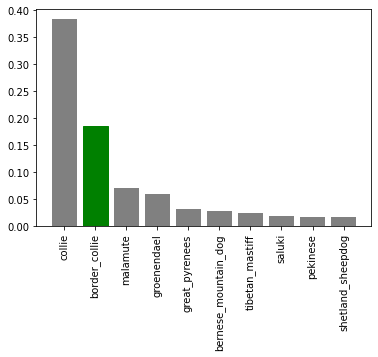

In [76]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visualize our predictions and evaluate our model, let's check out a few.

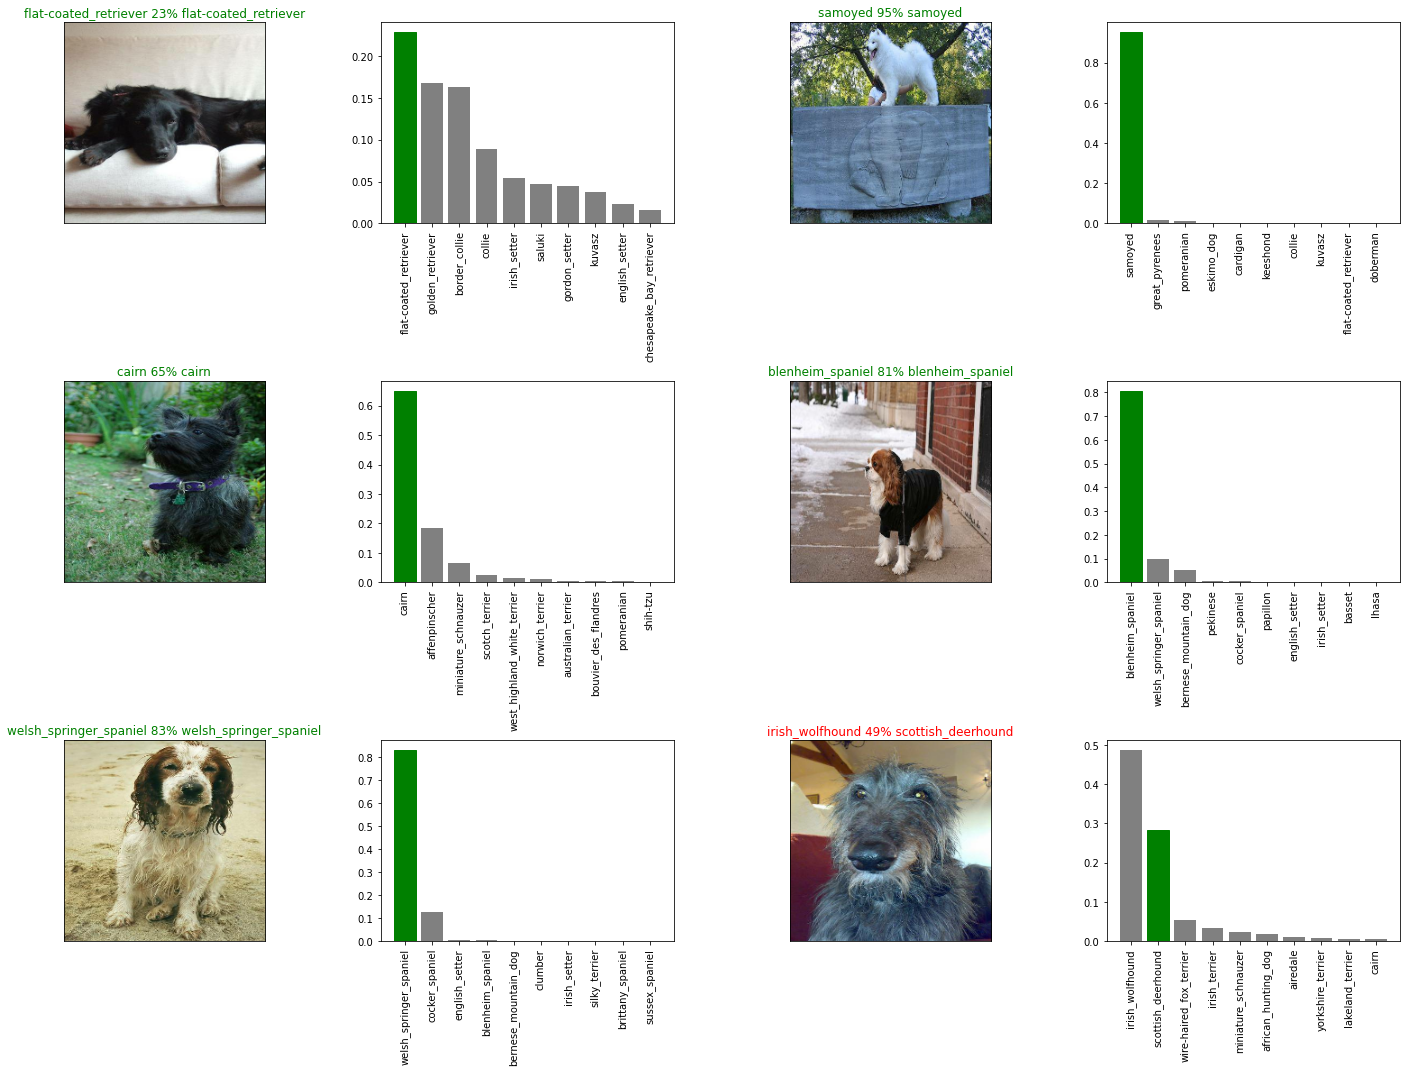

In [77]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols #(3 rows and 2 columns)
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0) # Bring Subplot in a structure pattern in a limited space
plt.show()

## Saving and reloading a trained model

In [78]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string)
  """

  # Create model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog_Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [79]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Now we've got the functions to save and load a trained model, let's make sure they work!

In [80]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog_Vision/models/20220902-06191662099547-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog_Vision/models/20220902-06191662099547-1000-images-mobilenetv2-Adam.h5'

In [81]:
# Load a trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Dog_Vision/models/20220901-04191662005993-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Dog_Vision/models/20220901-04191662005993-1000-images-mobilenetv2-Adam.h5


In [82]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 2s 241ms/step - loss: 1.3325 - accuracy: 0.6350


[1.3325341939926147, 0.6349999904632568]

In [83]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 2s 126ms/step - loss: 1.2663 - accuracy: 0.6650


[1.2663474082946777, 0.6650000214576721]

## Training a big dog model (on the full data)

In [84]:
len(X), len(y)

(10222, 10222)

In [85]:
X[:10]

['/content/drive/MyDrive/Dog_Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog_Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [86]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [87]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [88]:
# Create a model for full model
full_model = create_model()

Buidling model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [89]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't moniter validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [90]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 163s 154ms/step - loss: 1.3275 - accuracy: 0.6746
Epoch 2/100
320/320 [==============================] - 69s 216ms/step - loss: 0.3985 - accuracy: 0.8837
Epoch 3/100
320/320 [==============================] - 81s 254ms/step - loss: 0.2344 - accuracy: 0.9368
Epoch 4/100
320/320 [==============================] - 90s 281ms/step - loss: 0.1535 - accuracy: 0.9628
Epoch 5/100
320/320 [==============================] - 96s 300ms/step - loss: 0.1055 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 77s 240ms/step - loss: 0.0762 - accuracy: 0.9869
Epoch 7/100
320/320 [==============================] - 77s 241ms/step - loss: 0.0573 - accuracy: 0.9922
Epoch 8/100
320/320 [==============================] - 65s 202ms/step - loss: 0.0456 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0393 - accuracy: 0.9956
Epoch 10/100
320/320 [==============================] - 44s 139

In [91]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog_Vision/models/20220902-06521662101561-full-image-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog_Vision/models/20220902-06521662101561-full-image-set-mobilenetv2-Adam.h5'

In [92]:
# Load in the full model
loaded_full_model = load_model("/content/drive/MyDrive/Dog_Vision/models/20220901-07141662016442-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog_Vision/models/20220901-07141662016442-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [103]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Dog_Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog_Vision/test/dd8d95720349f85d2a795adaafc71172.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e73d52671c56e1507fed58c4c287d5f1.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e312dda8d35118c40880c0f331c09509.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e089aa32bc96c2a9753e7a5fcdc1bac9.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e440ec011c3c7ea94838ab5fc466159c.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e30a97eb637239e3b15c903529e04800.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/de4223b8c5ca7b80d34d1cd2b5e62351.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/debfa5cad80e35c510dff6ca29b94ca3.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/e75eb1ed7b8e53fec8eb9e03c57153b2.jpg',
 '/content/drive/MyDrive/Dog_Vision/test/f2e4e4f1ab9d156443682dc4653f23e5.jpg']

In [104]:
len(test_filenames)

10357

In [105]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches....


In [106]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling predict() on our full model and passing it the test data batch will take a long time to run (about a ~1hr). This is because we have to process ~10,000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [107]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 77s 237ms/step


In [108]:
# Save predictions (Numpy array) to csv file (for access later)
# np.savetxt("/content/drive/MyDrive/Dog_Vision/preds_array.csv", test_predictions, delimiter=",")

In [109]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("/content/drive/MyDrive/Dog_Vision/preds_array.csv", delimiter=",")

In [110]:
test_predictions[:10]

array([[3.11246460e-08, 5.02440400e-07, 1.14823960e-12, ...,
        5.00682698e-12, 3.32607968e-08, 8.89538327e-08],
       [4.08142742e-10, 2.52292680e-13, 7.59460366e-13, ...,
        1.65521416e-12, 3.83637187e-13, 1.23898599e-13],
       [6.61919825e-12, 2.92881891e-17, 1.00771448e-11, ...,
        2.24013829e-15, 1.26840433e-13, 1.93659366e-15],
       ...,
       [1.76950982e-10, 5.45430964e-07, 7.02480652e-12, ...,
        4.04264566e-10, 6.99102338e-06, 3.67102682e-10],
       [7.10557898e-15, 2.10096936e-12, 1.52636515e-16, ...,
        3.37035892e-15, 7.39245265e-19, 8.28626369e-19],
       [5.05115310e-08, 6.43925233e-08, 9.60641657e-04, ...,
        2.86763395e-07, 1.93839901e-06, 3.70174197e-10]])

In [111]:
test_predictions.shape

(10357, 120)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed. https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [112]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head

<bound method NDFrame.head of Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japan

In [113]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [114]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [115]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,dd8d95720349f85d2a795adaafc71172,3.112465e-08,5.024404e-07,1.148240e-12,6.196766e-14,3.397516e-11,3.867982e-11,8.975070e-09,2.092556e-09,7.111282e-11,...,1.236546e-07,1.089404e-09,1.987035e-10,6.958135e-12,5.866207e-11,1.763150e-10,4.868343e-07,5.006827e-12,3.326080e-08,8.895383e-08
1,e73d52671c56e1507fed58c4c287d5f1,4.081427e-10,2.522927e-13,7.594604e-13,6.454358e-11,8.485367e-12,1.098176e-06,2.049316e-12,2.110580e-12,2.406449e-12,...,8.365219e-11,2.420533e-14,5.798339e-12,6.174761e-12,5.737061e-13,4.249343e-10,2.074767e-11,1.655214e-12,3.836372e-13,1.238986e-13
2,e312dda8d35118c40880c0f331c09509,6.619198e-12,2.928819e-17,1.007714e-11,4.659044e-16,5.336523e-14,1.744187e-17,4.392705e-17,8.322239e-14,1.005837e-13,...,2.472408e-13,7.317898e-13,2.671111e-15,1.748803e-19,2.181037e-15,1.510944e-16,1.949905e-14,2.240138e-15,1.268404e-13,1.936594e-15
3,e089aa32bc96c2a9753e7a5fcdc1bac9,7.699478e-12,7.244707e-10,4.786210e-11,1.580478e-11,6.659557e-12,1.075153e-09,9.249049e-13,1.808358e-14,6.776245e-12,...,3.253113e-13,1.408793e-11,2.416361e-12,6.706635e-11,1.302569e-10,3.886030e-14,4.779532e-11,1.594863e-07,2.274502e-09,3.565343e-13
4,e440ec011c3c7ea94838ab5fc466159c,1.087116e-07,2.651396e-11,1.209884e-12,1.279625e-11,8.464606e-10,3.240974e-13,6.962585e-13,2.738388e-12,1.043527e-11,...,1.749208e-04,2.136972e-11,4.066255e-09,4.088624e-12,1.406268e-10,2.255993e-13,4.137790e-12,2.229485e-12,9.298417e-09,9.358347e-08


In [116]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("/content/drive/MyDrive/Dog_Vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## Making predictions on custom images

To make predictions on custom images, we'll:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using create_data_batches(). And since our custom images won't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [126]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [127]:
custom_image_paths

['/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_1.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_2.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_3.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_7.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_4.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_5.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_6.jpg',
 '/content/drive/MyDrive/Dog_Vision/My_Dog_Photos/Dog_photo_8.jpg']

In [128]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches....


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [129]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [130]:
custom_preds.shape

(8, 120)

In [131]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range (len(custom_preds))]
custom_pred_labels

['english_setter',
 'chihuahua',
 'eskimo_dog',
 'staffordshire_bullterrier',
 'german_shepherd',
 'bull_mastiff',
 'italian_greyhound',
 'eskimo_dog']

In [132]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

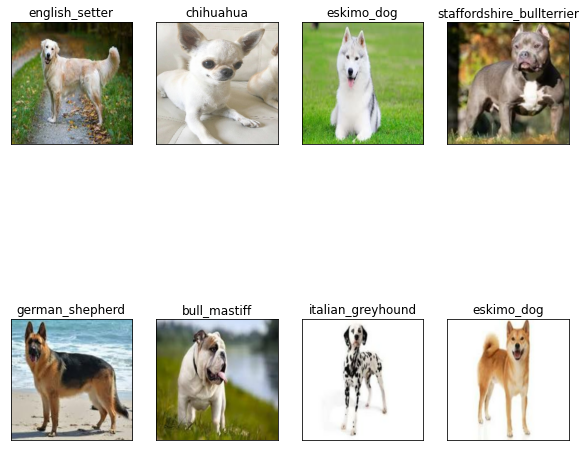

In [135]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(2, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)